# Day 7: Decision Trees
For this lab, we will be working with another built-in sklearn dataset, studying breast cancer. This is a classic dataset for binary classification.

In [1]:
# This is to ensure your outputs match the solution
import numpy as np
np.random.seed(0)

In [2]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

#### Recall that we can use `feature_names` and `target_names` attributes of sklearn datasets to get more information.

In [3]:
# print out the feature and target names for this dataset
cancer_data.feature_names, cancer_data.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

#### Using the `data` and `target` attributes to get the actual data, split the dataset into the training and testing sets, with a test size of 0.2.

In [4]:
from sklearn.model_selection import train_test_split

# your code here
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size = 0.2)

In [5]:
y_train.shape, y_test.shape

((455,), (114,))

#### Now that we have our training and testing dataset, create a decision tree classifier for this dataset, and print out the recall score.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score   # f1-score and ROC AUC score are better metrics than the recall

# your code here
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
recall = recall_score(y_pred, y_test)
print(recall)

0.9523809523809523


There are many parameters we can tune for a Decision Tree classifier. One such parameter is deciding which splitting criteria to use; currently, sklearn supports the Gini index and entropy as the criterion.

Write a loop that creates a decision tree classifier for each of these splitting criteria (by specifying the `criterion` paramter), and plot the recall for each one.

Text(0, 0.5, 'Recalls')

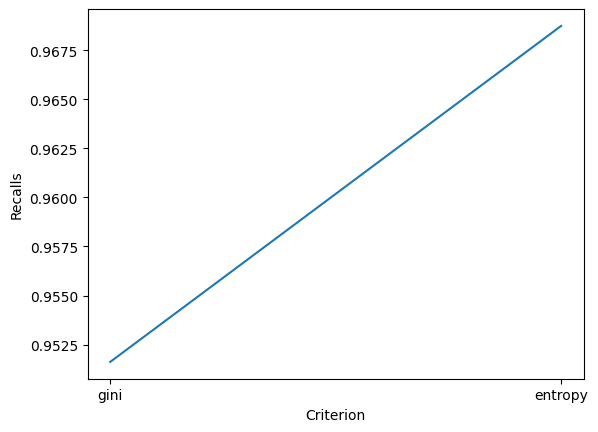

In [7]:
import matplotlib.pyplot as plt

criteria = ['gini', 'entropy']

recalls = []

# for each criterion
  # Create a decision tree classifier with the criterion
  # Fit the classifier to your training set
  # Get the predicted output for your testing set
  # Append the recall to the list

for c in criteria:
  clf = DecisionTreeClassifier(criterion = c)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  recalls.append(recall_score(y_pred, y_test))

# plot the result
plt.plot(criteria, recalls)
plt.xlabel("Criterion")
plt.ylabel("Recalls")

##### Another paramter for Decision Tree classifier is specifying the minimum number of samples at each leaf node. You can specify this by using the `min_samples_leaf` parameter of the `DecisionTreeClassifier`.

Similar to what we did above, create a loop to test the values 1 through 40 as your mininum number of samples. Make sure to use the criterion that resulted in the better recall.

Text(0, 0.5, 'Recall')

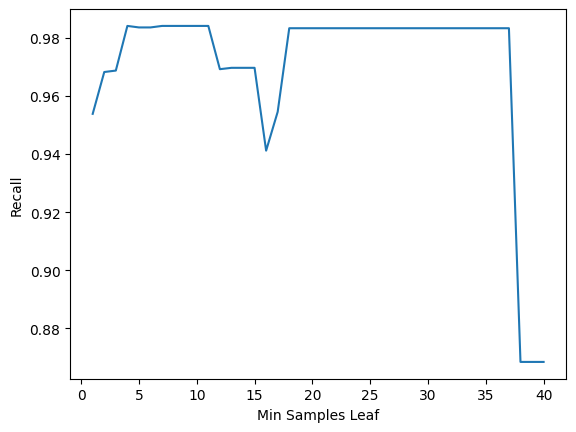

In [8]:
min_samples = range(1,41)

recalls = []

# your code here
for n in min_samples:
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  recalls.append(recall_score(y_pred, y_test))

plt.plot(min_samples, recalls)
plt.xlabel("Min Samples Leaf")
plt.ylabel("Recall")

By using the `max()` function and the `.index()` method, print the highest recall and the value of minimum samples that maximizes the recall

In [9]:
# your code here
max_recall = max(recalls)
index = recalls.index(max_recall)
max_min_sample = min_samples[index]
print(max_min_sample, max_recall)

4 0.9841269841269841


### Decision Tree Visualization

Create a final classifier `final_clf` using the `criterion` and `min_samples_leaf` that maximized the recall, and fit it to your training data. Run the next cell to get the visualization of the decision tree.

In [10]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# create your optimized classifer and fit it to your data
final_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 12)
final_clf.fit(X_train, y_train)

dot_data = export_graphviz(final_clf, out_file = None,
                           feature_names=cancer_data.feature_names,
                           class_names=cancer_data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH